In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('..')

from pipeline.models import wczytanie_materialow, oblicz_alfa, macierz_A, termostat

In [3]:
materialy = wczytanie_materialow()
alfa_powietrze = oblicz_alfa('powietrze', 100.0)
nx, ny = 50, 50
szerokosc = 3.0
h = szerokosc / (nx - 1)
T_startowa = 15.0
T_okna = 5.0
T_grzejnika = 40.0
T_cel = 21.0
czujnik_x = 25
czujnik_y = 25
idx_czujnika = czujnik_y * nx + czujnik_x


dt = 20.0
kroki = 5000

In [ ]:
pokoj_A = np.ones((nx, ny)) * T_startowa
pokoj_A[0, 15:35] = T_okna
pokoj_A[1:5, 20:30] = T_grzejnika

u_pokoj_A = pokoj_A.flatten()

A_inv_on_A = macierz_A(nx, ny, alfa_powietrze, dt, h, (u_pokoj_A != T_startowa))
A_inv_off_A = macierz_A(nx, ny, alfa_powietrze, dt, h, (u_pokoj_A == T_okna))

u_wynik_A = termostat(u_pokoj_A, A_inv_on_A, A_inv_off_A, T_grzejnika, T_cel, idx_czujnika, kroki)
wynik_A = u_wynik_A.reshape((ny, nx))

In [11]:
pokoj_B = np.ones((nx, ny)) * T_startowa
pokoj_B[0, 15:35] = T_okna
pokoj_B[-5:-1, 20:30] = T_grzejnika

u_pokoj_B = pokoj_B.flatten()

A_inv_on_B = macierz_A(nx, ny, alfa_powietrze, dt, h, (u_pokoj_B != T_startowa))
A_inv_off_B = macierz_A(nx, ny, alfa_powietrze, dt, h, (u_pokoj_B == T_okna))

u_wynik_B = termostat(u_pokoj_B, A_inv_on_B, A_inv_off_B, T_grzejnika, T_cel, idx_czujnika, kroki)

wynik_B = u_wynik_B.reshape((nx, ny))

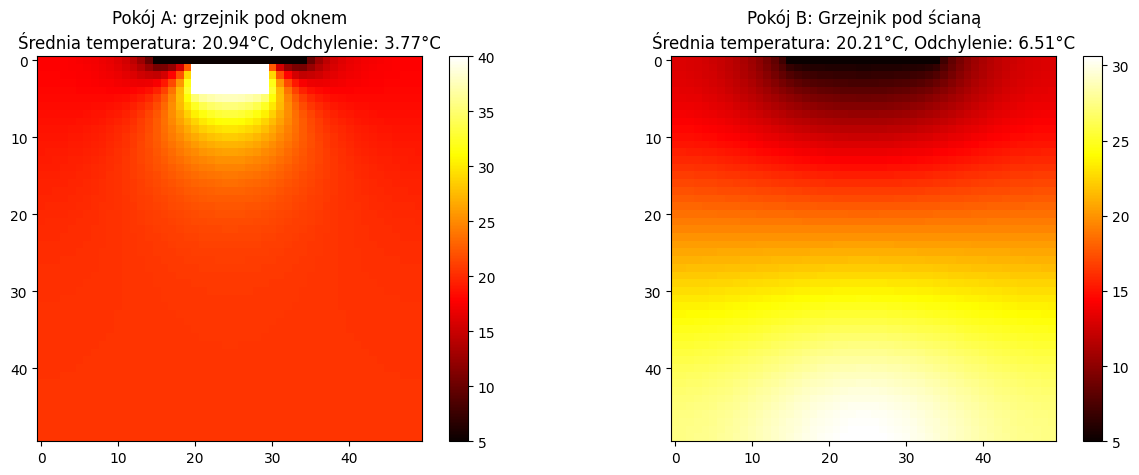

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

im1 = ax[0].imshow(wynik_A, cmap='hot')
ax[0].set_title(f"Pokój A: grzejnik pod oknem\nŚrednia temperatura: {np.mean(wynik_A):.2f}°C, Odchylenie: {np.std(wynik_A):.2f}°C")
plt.colorbar(im1, ax=ax[0])

im2 = ax[1].imshow(wynik_B, cmap='hot')
ax[1].set_title(f"Pokój B: Grzejnik pod ścianą\nŚrednia temperatura: {np.mean(wynik_B):.2f}°C, Odchylenie: {np.std(wynik_B):.2f}°C")
plt.colorbar(im2, ax=ax[1])

plt.show()